# **CVPS20 // Mini-Assignment**

assigned : **Sep 3, 2020**

DUE : **Sep 8, 2020 11:59pm**

## Estimating the Higgs Mass Using 1-D Data

<img src="https://www.quantumdiaries.org/wp-content/uploads/2012/09/ATLASMgg-1024x735.png" width=500x>

---

In our first class we discussed the plot above showing the number of events in the ATLAS detector at the LHC as a function of energy.  The "bump" in the plot (which is from [this paper](https://doi.org/10.1016/j.physletb.2012.08.020
)) represented the discovery of a new particle called the [Higgs boson](https://en.wikipedia.org/wiki/Higgs_boson).  In this mini-assignment, you will estimate the mass of the Higgs by removing the background from the data and fitting the residual with a [Gaussian](https://en.wikipedia.org/wiki/Gaussian_function) by eye.  

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed at the top of this notebook.  Direct copying from someone else's notebook is not permitted.

2. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term (see CVPS20 syllabus).

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

In [7]:
import numpy as np
from matplotlib import pyplot as plt

**Run the cell below to define the energy, number of events, and background model for the data.**

In [3]:
# -- define energy bin centers
energy = np.arange(101, 161, 2)

# -- define the number of events for each energy bin
events = np.array([3611.8, 3386.4, 3323.5, 3150.5, 2982.7, 2814.9, 2715.3, 
                   2610.5, 2453.2, 2254., 2191.1, 2191.1, 2123., 2070.5, 
                   1881.8, 1808.4, 1682.6, 1614.4, 1509.6, 1404.7, 1410., 
                   1268.4, 1294.7, 1174.1, 1153.1, 1137.4,  974.9, 1011.6, 
                   1037.8,  948.7])

# -- define the background signal for each energy bin
backgr = np.array([3604.7, 3440.7, 3282., 3128.7, 2980.8, 2838.5, 2701.8, 
                   2570.7, 2445.3, 2325.5, 2211.4, 2102.9, 1999.9, 1902.4, 
                   1810.2, 1723.3, 1641.6, 1564.8, 1492.8, 1425.4, 1362.5, 
                   1303.7, 1248.9, 1197.8, 1150.1, 1105.4, 1063.6, 1024.3,  
                   987.,  951.5])


**For each energy bin, subtract off the background from the events to calculate the residuals.**

In [9]:
resi = events-backgr

**Make a plot of the residuals as a function of energy (i.e., something similar to the black points in the bottom plot at the top of this notebook, but without error bars).  Make sure to label your axes.**

Text(0, 0.5, 'Events - Bckg')

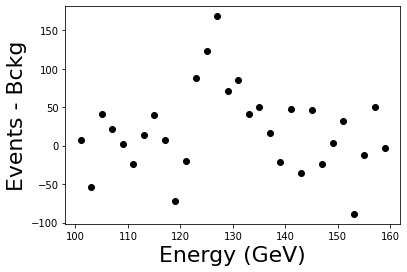

In [21]:
plt.scatter(x = energy, y = resi, c = 'k')
plt.xlabel('Energy (GeV)', size = 22)
plt.ylabel('Events - Bckg', size = 22)

Text(0, 0.5, 'Events - Bckg')

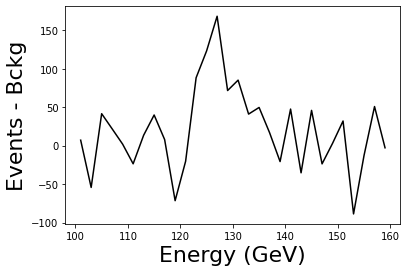

In [23]:
plt.plot(energy, resi, c = 'k')
plt.xlabel('Energy (GeV)', size = 22)
plt.ylabel('Events - Bckg', size = 22)

A Gaussian is defined by two numbers, its peak location and its width.  **Fit a Gaussian (as a function of energy) "by eye" to the residuals by adjusting the peak location and width (as well as the overall amplitude scaling) until it looks like a "reasonable" fit to the data.$^{\dagger}$  The peak location is roughly the Higgs mass; what is that value?**

<small>$^{\dagger}$ Note, the NumPy function for an exponential of `e` is `np.exp`. </small>

In [24]:
#inefficent code used to eyeball best parameter guesses
pk_loc = np.arange(125, 130)
pk_wid = np.arange(4,9)
amp = np.arange(148,153)
for i in pk_loc:
  for j in pk_wid:
    for k in amp:
        gauss_fit = k * np.exp( -((energy - i) / j) ** 2)
        plt.plot(energy, gauss_fit, 'r')
        plt.plot(energy, resi, 'k')
        plt.show()
        print(i, j, k)

array([1.75164509e-03, 8.89558775e-03, 3.98672584e-02, 1.57678066e-01,
       5.50350526e-01, 1.69519896e+00, 4.60802854e+00, 1.10540858e+01,
       2.34014999e+01, 4.37197575e+01, 7.20816942e+01, 1.04878246e+02,
       1.34666334e+02, 1.52596948e+02, 1.52596948e+02, 1.34666334e+02,
       1.04878246e+02, 7.20816942e+01, 4.37197575e+01, 2.34014999e+01,
       1.10540858e+01, 4.60802854e+00, 1.69519896e+00, 5.50350526e-01,
       1.57678066e-01, 3.98672584e-02, 8.89558775e-03, 1.75164509e-03,
       3.04390274e-04, 4.66797604e-05])

In [ ]:
Peak location is roughly 127. Mass of Higgs Boson based on this is 127 Gev. 
Literature value is 125 GeV. 

**Plot your best-fit (by eye) Gaussian with the residuals, similar to the bottom plot at the top of this notebook.  Make sure to label your axes.**

Text(0, 0.5, 'Events - Bckg')

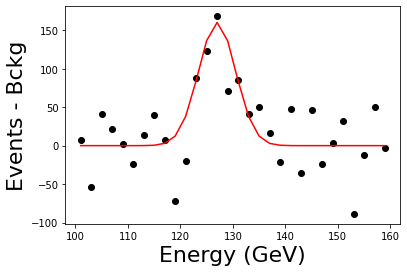

In [40]:
#guesses for peak location, peak width, and amplitude. Used to fit gaussian
pk_loc = 127
pk_wid = 5
amp = 160
gauss_fit = amp * np.exp( -((energy - pk_loc) / pk_wid) ** 2)
gauss_fit

plt.plot(energy, gauss_fit, 'r')
plt.scatter(energy, resi, c = 'k')
plt.xlabel('Energy (GeV)', size = 22)
plt.ylabel('Events - Bckg', size = 22)

**For each energy bin, add your Gaussian to the background and overplot this on top of the events data (i.e., roughly recreate the top plot at the top of this notebook).  Make sure to label your axes.**

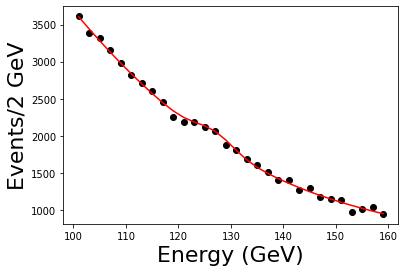

In [47]:
plt.plot(energy, gauss_fit + backgr, 'r')
plt.scatter(energy, events, c = 'k')
plt.xlabel('Energy (GeV)', size = 22)
plt.ylabel('Events/2 GeV', size = 22)
plt.show()
